# Exploring possibilities with `topojson`
Going to take a look at whether it is possible to make a topological data structure backing the tilings. Steps involved:

+ Initial exploration of converting a TileUnit to a `topojson` object and back again (i.e. retrieve the points, edges, faces) - DONE at 27/11/23
+ Look into shapely's new precision options - and generally rationalise the various hacks for keeping polygons clean - DONE 15/12/23 (keep an eye on it for errors, of course...)
+ Build said data structure from clean polgons
+ Explore 'wobbly' edge use-case

In [1]:
%matplotlib inline

from weavingspace.topology import Topology
from weavingspace import TileUnit
from weavingspace import tiling_utils

import geopandas as gpd
import pandas as pd
import shapely.geometry as geom
import shapely.affinity as affine

import copy

In [2]:
tile = TileUnit(
  # tiling_type = "hex-colouring", n = 7, dissection_offset = 1
  tiling_type = "hex-dissection", n = 3, dissection_offset = 1
  # tiling_type = "laves", code = "4.6.12"
  # tiling_type = "archimedean", code = "3.3.4.3.4"
  # tiling_type = "archimedean", code = "4.8.8"
  # tiling_type = "cairo"
)

In [3]:
topo = Topology(tile)

/Users/osullid3/miniconda3/envs/weaving/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


<Axes: >

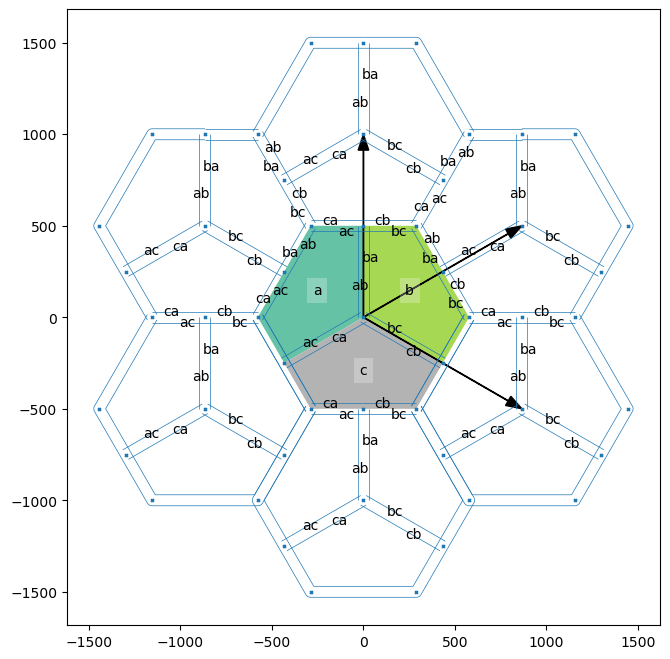

In [4]:
ax = tile.plot(figsize = (8, 8), cmap = "Set2", show_tile = False, show_reg_tile = False, show_vectors = True)

gdf = gpd.GeoDataFrame(
  geometry = gpd.GeoSeries([g["geometry"].parallel_offset(30, side = "left") for g in topo.edges.values()]), 
  data = {"label": [g["label"] for g in topo.edges.values()]}
)

gdf.plot(ax = ax, lw = 0.5)

for lab, g in zip(gdf.label, gdf.geometry):
  ax.annotate(text = lab,
              xy = (g.interpolate(0.35, True).x - 40,
                    g.interpolate(0.35, True).y - 20))
  
gpd.GeoSeries([v for v in topo.vertices.values()]).plot(ax = ax, markersize = 4, marker = "x")

<Axes: >

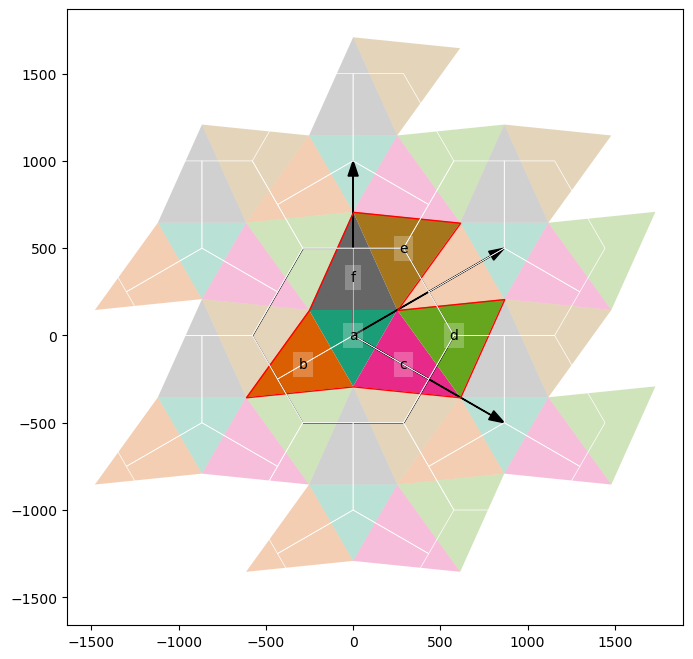

In [5]:
tile = TileUnit(tiling_type = "hex-dissection", code = "3.3.4.3.4", n = 3)
dual = copy.deepcopy(tile)
dual.elements = tiling_utils.get_dual_tile_unit(tile)
dual.setup_regularised_tile_from_elements()
ax = dual.plot(show_vectors = True, r = 1)
tile.get_local_patch(include_0 = True).plot(ax = ax, fc = "#00000000", ec = "w", lw = 0.5)

<Axes: >

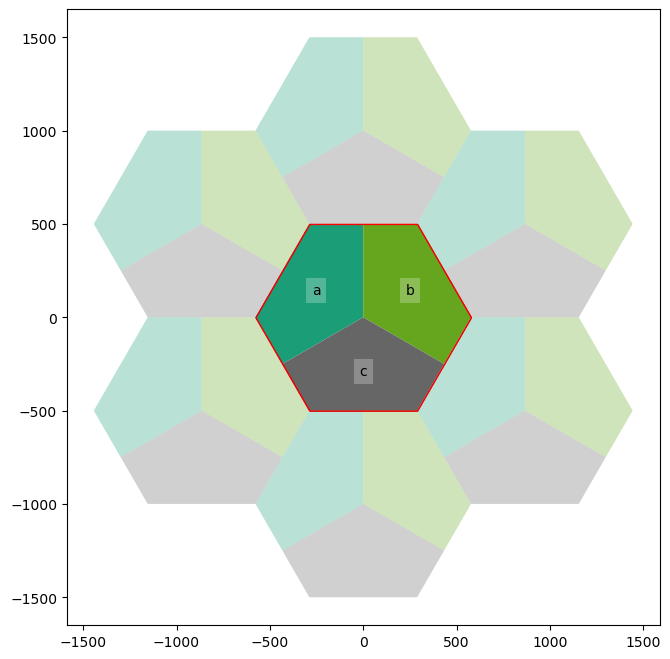

In [6]:
tile.plot(r = 1)

<Axes: >

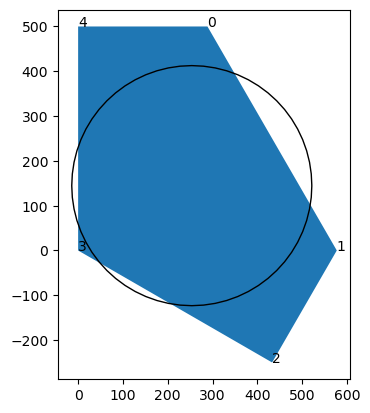

In [7]:
t = TileUnit(tiling_type = "hex-dissection", n = 3).elements.geometry[1]
corners  = [v for v in t.exterior.coords][:-1]
ax = gpd.GeoSeries([t]).plot()
for i, c in enumerate(corners):
  ax.annotate(text = i, xy = c)
gpd.GeoSeries([tiling_utils.incentre(t).buffer(tiling_utils.get_apothem_length(t))]).plot(ax = ax, ec = "k", fc = "#00000000")

In [8]:
t = TileUnit(tiling_type = "square-colouring", n = 5).elements.geometry.unary_union
t = TileUnit(tiling_type = "hex-dissection", n = 4).elements.geometry[0]
tiling_utils.get_interior_angles(t)

[120.0000001022408, 59.99999998370286, 89.9999999590014, 89.99999995505497]

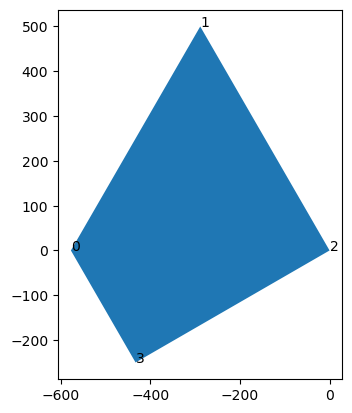

In [9]:
ax = gpd.GeoSeries([t]).plot()
for i, p in enumerate(tiling_utils.get_corners(t, repeat_first = False)):
  ax.annotate(text = i, xy = (p.x, p.y))